In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

## Data Assessing

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.duplicated().sum().any()

False

In [8]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [10]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [11]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [12]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

## Quality Issues

> 1- nan values in Outlet_Size column

> 2- records with 0.000000 value in Item_Visibility column

> 3- different values that represent the same thing at Item_Fat_Content column ('Low Fat', 'Regular', 'low fat', 'LF', 'reg')


-------------

## Data Cleaning

In [39]:
df_clean3=df.copy()

### Define : remove rows with missing values

### Code

In [41]:
df_clean3.drop(columns=['Item_Weight','Outlet_Size'],axis=1,inplace=True)

### Test

In [42]:
df_clean3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [43]:
df_clean3.shape

(8523, 10)

-----------

### Define : Repalce rows with 0.000000 values in Item_Visibility column with the average value 

### Code

In [44]:
df_clean3.Item_Visibility.replace(0.000000,np.mean(df_clean['Item_Visibility']),inplace=True)

### Test

In [45]:
df_clean3.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.069878,140.992782,1997.831867,2181.288914
std,0.048787,62.275067,8.371760,1706.499616
min,0.003575,31.290000,1985.000000,33.290000
25%,0.033085,93.826500,1987.000000,834.247400
50%,0.060700,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


-------

### Define: Replace rows with 'LF' or  'low fat' values with 'Low Fat' and rows with 'reg' value with 'Regular'
different values that represent the same thing at Item_Fat_Content column ('Low Fat', 'Regular', 'low fat', 'LF', 'reg')

### Code

In [46]:
df_clean3['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat',inplace=True)
df_clean3['Item_Fat_Content'].replace('reg','Regular',inplace=True)

### Test

In [47]:
df_clean3['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

--------

## Questions


1) What is the relation between fats and sales ?

2) Relation between visibility and sales

3) Relation between sales and location

4) Item type with the highest sale

5) Item with highest visibility


In [48]:
df_clean3.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228


In [49]:
print('Sales of different fat content \n', df_clean3.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())

Sales of different fat content 
 Item_Fat_Content
Low Fat    1.190409e+07
Regular    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64


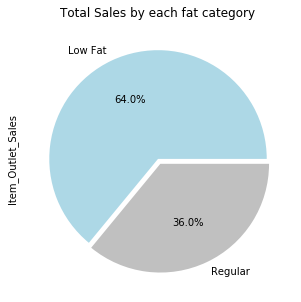

In [50]:
my_colors = ['lightblue','silver']
my_explode = (0, 0.05)
fig,ax=plt.subplots(figsize=(8,5))
df_clean3.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().plot(kind='pie',
                                                                     autopct='%1.1f%%',colors=my_colors,explode=my_explode)
plt.title('Total Sales by each fat category')
plt.show()

> Most of customers prefer low fat products than regular fat products

C:\Users\Sayed\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


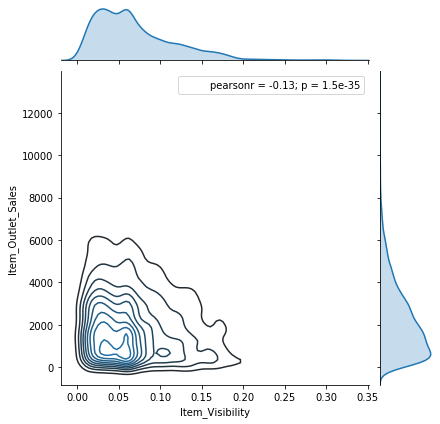

In [51]:
#sns.jointplot(data=df_clean,x='Item_Visibility',y='Item_Outlet_Sales',kind='hex')
from scipy import stats
g=sns.JointGrid(data=df_clean3,x='Item_Visibility',y='Item_Outlet_Sales')
g=g.plot_joint(sns.kdeplot)
g=g.plot_marginals(sns.kdeplot,shade=True)
g=g.annotate(stats.pearsonr)

> The relation between item visibility and sales is weak

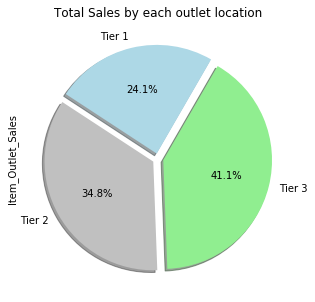

In [55]:
my_colors = ['lightblue','silver','LightGreen']
my_explode = (0.05 ,0.05,0.05)
fig,ax=plt.subplots(figsize=(8,5))
df_clean3.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().plot(kind='pie',autopct='%1.1f%%', 
                                                                         startangle=60, shadow = True,colors=my_colors
                                                                         ,explode=my_explode)
plt.title('Total Sales by each outlet location')
plt.show()

> Difference between Tier 3 and Tier 2 is not high, on the contrary differnce between Tier 1 and Tier 2 is nearly 10 %

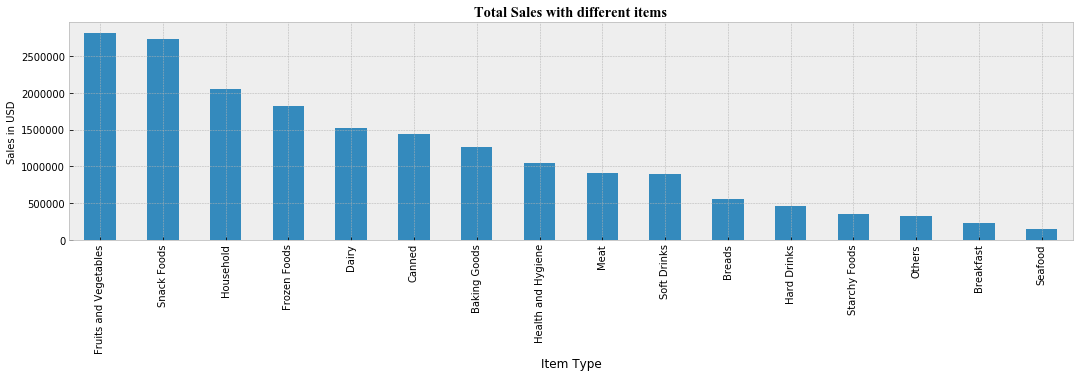

In [57]:
fig,ax=plt.subplots(figsize=(18,4))
plt.style.use('bmh')
df_clean3.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales with different items',fontname='Times new roman')
#plt.yticks([200000,400000,600000,800000,1000000,1200000,1400000,1600000],
#           ['200K $','400K $','600K $','800K $','1M $','1.2M $','1.4M $','1.6M $'])
plt.xlabel('Item Type')
plt.ylabel('Sales in USD',fontsize=10)
plt.show()

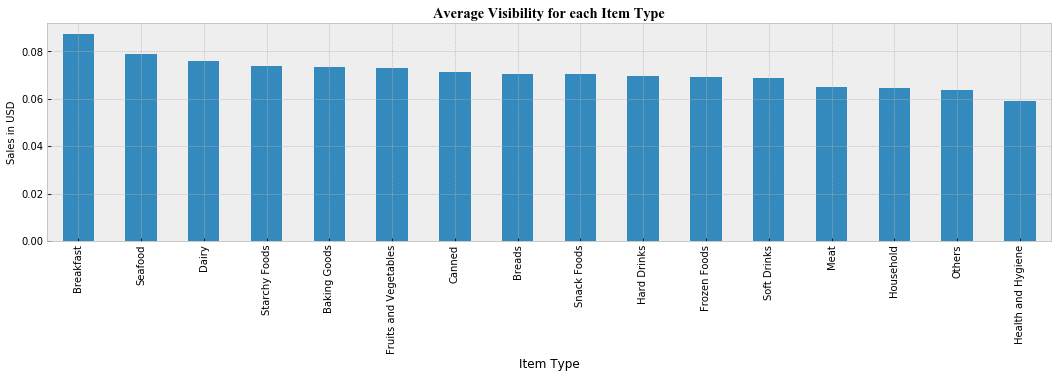

In [60]:
fig,ax=plt.subplots(figsize=(18,4))
df_clean3.groupby('Item_Type')['Item_Visibility'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Visibility for each Item Type',fontname='Times new roman')
#plt.yticks([200000,400000,600000,800000,1000000,1200000,1400000,1600000],
#           ['200K $','400K $','600K $','800K $','1M $','1.2M $','1.4M $','1.6M $'])
plt.xlabel('Item Type')
plt.ylabel('Sales in USD',fontsize=10)
plt.show()

In [62]:
df_clean3.corr(method='pearson')

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.004937,-0.078352,-0.134178
Item_MRP,-0.004937,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.078352,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.134178,0.567574,-0.049135,1.000000


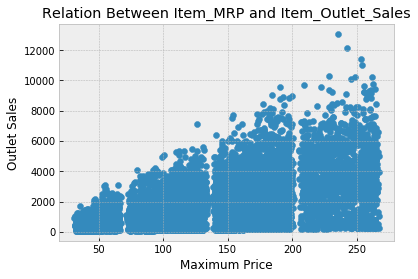

In [71]:
plt.scatter(x=df_clean3['Item_MRP'],y=df_clean3['Item_Outlet_Sales'])
plt.title('Relation Between Item_MRP and Item_Outlet_Sales')
plt.xlabel('Maximum Price')
plt.ylabel('Outlet Sales')
plt.show()

-----

## Conclusion
- 1- Majority of people prefer low fat products
- 2- The corelation between Item visibility and sales is very low
- 3- Tier 3 has the highest amount of sales
- 4- the correlation between the macimum retail price and the oulet sales is quite moderate . 
- 5- Breakfast category has the highest average visibilty .
- 6- Fruits and vegetables recorded the highest sales. 